In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.stats import entropy
import matplotlib.pyplot as plt


In [2]:
clean = np.load("../data/raw_signals/clean_signal.npy")
narrow = np.load("../data/raw_signals/narrowband_rfi.npy")
broad = np.load("../data/raw_signals/broadband_rfi.npy")
impulse = np.load("../data/raw_signals/impulsive_rfi.npy")


In [3]:
def extract_features(signal, fs=1000):
    # Time-domain features
    mean_power = np.mean(signal**2)
    variance = np.var(signal)
    max_amp = np.max(np.abs(signal))
    
    # Frequency-domain features
    yf = np.abs(fft(signal))
    xf = fftfreq(len(signal), 1/fs)
    
    peak_freq = np.abs(xf[np.argmax(yf)])
    spec_entropy = entropy(yf + 1e-10)
    
    return [mean_power, variance, peak_freq, spec_entropy, max_amp]


In [4]:
data = []
labels = []

signals = [
    (clean, 0),
    (narrow, 1),
    (broad, 2),
    (impulse, 3)
]

for sig, label in signals:
    features = extract_features(sig)
    data.append(features)
    labels.append(label)


In [5]:
columns = [
    "Mean_Power",
    "Variance",
    "Peak_Frequency",
    "Spectral_Entropy",
    "Max_Amplitude"
]

df = pd.DataFrame(data, columns=columns)
df["Label"] = labels

df


,Mean_Power,Variance,Peak_Frequency,Spectral_Entropy,Max_Amplitude,Label
0,0.499500,0.499500,50.0,3.332589,0.999999,0
1,0.624375,0.624375,50.0,4.118868,1.493535,1
2,0.778010,0.777807,50.0,6.622579,2.279381,2
3,0.999260,0.999260,50.0,5.954083,5.997923,3


In [6]:
df.to_csv("../data/processed/features.csv", index=False)


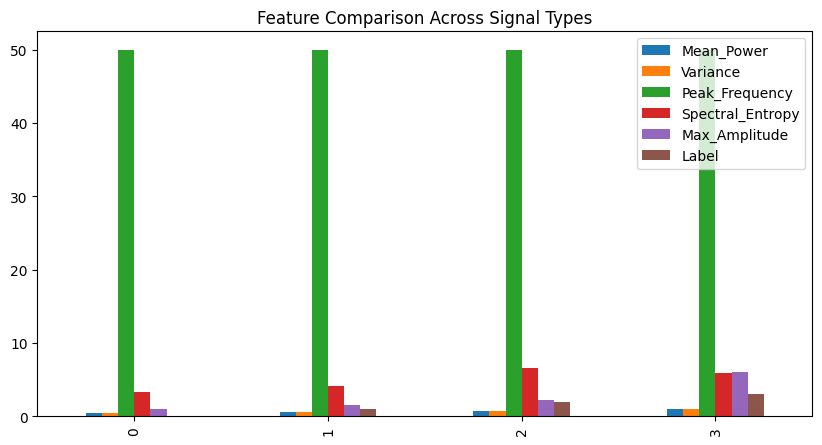

In [7]:
df.plot(kind="bar", figsize=(10,5))
plt.title("Feature Comparison Across Signal Types")
plt.show()
